In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import glob
import scipy.stats as stats
import researchpy




%matplotlib inline

import SimpleITK as sitk
# Download data to work on

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('expand_frame_repr', False)

In [86]:
# seq can be "in, F, W, OPP"
pax = 'MCM'#'ACF' 'MCM'
seq = 'ADC'#'in' 
side='' #'1'
mt = 'ADC'# 'z' # mask type can be z (skin fat) or intra or ADC

if (pax=='MCM'):    
    all_mask_fd = "MCM_masks_"+mt
    if (seq=='in'):
        all_mask_fn = glob.glob(all_mask_fd+'/*baseline_masked*'+mt+side+'*') + sorted(glob.glob(all_mask_fd+'/*30*z'+side+'*'))
    if (seq=='W'): 
        all_mask_fn = glob.glob(all_mask_fd+'/*baseline*W*'+mt+side+'*') + sorted(glob.glob(all_mask_fd+'/*28*W*z'+side+'*'))
    if (seq=='F'):
        all_mask_fn = glob.glob(all_mask_fd+'/*baseline*F*'+mt+side+'*') + sorted(glob.glob(all_mask_fd+'/*29*F*z'+side+'*'))
    if (seq=='OPP'):
        all_mask_fn = glob.glob(all_mask_fd+'/*baseline*OPP*'+mt+side+'*') + sorted(glob.glob(all_mask_fd+'/*31*OPP*z'+side+'*'))
    if (seq=='ADC'):
        all_mask_fn = glob.glob(all_mask_fd+'/*baseline_masked*'+'*') + sorted(glob.glob(all_mask_fd+'/*21*z'+'*'))
else:
    all_mask_fd = "ACF_masks_"+mt
    if (seq=='in'):
        all_mask_fn = glob.glob(all_mask_fd+'/*baseline_masked*'+mt+side+'*') + sorted(glob.glob(all_mask_fd+'/*21_m*z'+side+'*'))
    if (seq=='W'): 
        all_mask_fn = glob.glob(all_mask_fd+'/*baseline*W*'+mt+side+'*') + sorted(glob.glob(all_mask_fd+'/*21_W*z'+side+'*'))
    if (seq=='F'):
        all_mask_fn = glob.glob(all_mask_fd+'/*baseline*F*'+mt+side+'*') + sorted(glob.glob(all_mask_fd+'/*21_F*z'+side+'*'))
    if (seq=='OPP'):
        all_mask_fn = glob.glob(all_mask_fd+'/*baseline*OPP*'+mt+side+'*') + sorted(glob.glob(all_mask_fd+'/*21_OPP*z'+side+'*'))
    if (seq=='ADC'):
        all_mask_fn = glob.glob(all_mask_fd+'/*baseline_masked*'+'*') + sorted(glob.glob(all_mask_fd+'/*21*z'+'*'))

colors= ("blue", "orange", "green")
print(all_mask_fn)


['MCM_masks_ADC/MCM_ADC_baseline_masked.nii.gz', 'MCM_masks_ADC/MCM_ADC_221_masked.nii.gz', 'MCM_masks_ADC/MCM_ADC_321_masked.nii.gz']


M MCM_masks_ADC/MCM_ADC_baseline_masked.nii.gz
625.625 668.8290562036055 2240.0 1.0 126783.69627053458 3153529.0 4715 359725.9521484375
    count        mean         std  min    25%    50%    75%     max
0  4715.0  668.829056  356.066983  1.0  420.5  624.0  866.0  2240.0
C MCM_masks_ADC/MCM_ADC_221_masked.nii.gz


/home/robert/miniconda2/envs/fast2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/robert/miniconda2/envs/fast2/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/robert/miniconda2/envs/fast2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wi

693.28125 705.5785845588235 2320.0 5.0 70814.6396515929 3070678.0 4352 332031.25
    count        mean         std  min     25%    50%    75%     max
0  4352.0  705.578585  266.110202  5.0  532.75  697.0  875.0  2320.0
M MCM_masks_ADC/MCM_ADC_321_masked.nii.gz
769.166015625 797.8293590394047 2793.0 7.0 101557.27415819872 4717565.0 5913 451126.0986328125
    count        mean         std  min    25%    50%    75%     max
0  5913.0  797.829359  318.680521  7.0  575.0  770.0  985.0  2793.0


/home/robert/miniconda2/envs/fast2/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/robert/miniconda2/envs/fast2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/robert/miniconda2/envs/fast2/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility

<Figure size 1440x432 with 0 Axes>

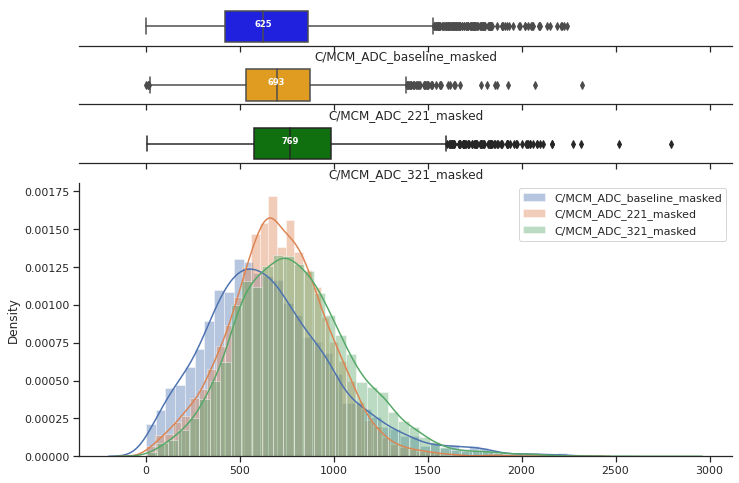

In [87]:
# bins_hist = 800
nf = len(all_mask_fn)
vertical_offset =0
a4_dims = (11.7, 8.27)
df_nda =pd.DataFrame(columns=['count','mean','std','min','25%','50%','75%','max'])
dades = {}

sns.set(style="ticks")
label_stats = sitk.LabelStatisticsImageFilter()

label_shape = sitk.LabelShapeStatisticsImageFilter()


# f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
#                                     gridspec_kw={"height_ratios": (.25, .75)})

plt.figure(figsize=(20, 6))
f, ax = plt.subplots(nf+1, figsize=a4_dims, sharex=True, 
                                    gridspec_kw={"height_ratios": (.1, 0.1,0.1, .70)})

ind =0

df = pd.DataFrame(columns=['Median','Mean', 'Max','Min','Variance','Sum','Count','Volume'])

for fd,fn in zip(all_mask_fd,all_mask_fn):
    print(fd,fn)
    mask_im= sitk.ReadImage(fn)
    m_sp = mask_im.GetSpacing()
    label_stats.Execute(mask_im, mask_im > 0)
    st_median = label_stats.GetMedian(1)
    st_mean = label_stats.GetMean(1)
    st_max = label_stats.GetMaximum(1)
    st_min = label_stats.GetMinimum(1)
    st_var = label_stats.GetVariance(1)
    st_sum = label_stats.GetSum(1)
    st_count = label_stats.GetCount(1)
    
    label_shape.Execute(mask_im>0)
    st_vol = label_shape.GetPhysicalSize(1)
#     print(m_sp)
#     st_vol = 0
#     for i in range(3):
#         st_vol += float(st_count) * m_sp[i]
    
    print(st_median, st_mean, st_max, st_min, st_var, st_sum,st_count,st_vol)
    df.loc[len(df), :] = [st_median, st_mean, st_max, st_min, st_var, st_sum,st_count, st_vol]
    nda = sitk.GetArrayViewFromImage(mask_im)
    nda_nz = nda[nda!=0].flatten()
    
    df_aux = pd.DataFrame(data=nda_nz)
    
    df_aux = df_aux.describe().transpose()
    print(df_aux)
    df_nda.loc[len(df_nda), :] = df_aux.loc[0]

#     dades[ind] = nda_nz.astype(float)
    dades[ind] =pd.DataFrame(nda_nz, columns = [fn[12:-7]]) # hard coded legends
#     dades[ind] = np.histogram(nda_nz, bins=1000)[0]
    
    
    bp = sns.boxplot(nda_nz, ax = ax[ind], color = colors[ind])
    ax[ind].set(xlabel=fn[12:-7])
    bp.text(st_median + vertical_offset,0,int(st_median), 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')
    sns.distplot(nda_nz, ax=ax[nf], label = fn[12:-7] )
    
    sns.despine(ax=ax[ind], left=True)
    ax[ind].set(yticks=[])
    ind += 1



sns.despine(ax=ax[nf])

plt.legend()
plt.show()


### Statistical Analysis.
Performing t-test on two indenpendent samples (can't do paired t-test as they don't have the same number of pixels exactly.
https://www.marsja.se/how-to-perform-a-two-sample-t-test-with-python-3-different-methods/
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3444174/


In [88]:
s1 = 0
s2 = 1
df_cohens = pd.DataFrame(columns=['Cohens'])#,'CI1','CI1','P-value'])


des,res = researchpy.ttest(dades[s1][all_mask_fn[s1][12:-7]],dades[s2][all_mask_fn[s2][12:-7]],equal_variances= False)
# print(des)
# print(res)
df_cohens.loc[1] = res.loc[6]['results'] # guardar cohens's

# df_cohens.loc[0]['CI1'] = des.loc[0]['95% Conf'] # guardar cohens's
# df_cohens.loc[0]['CI2'] = des.loc[0]['Interval'] # guardar cohens's
# df_cohens.loc[1]['CI1'] = des.loc[1]['95% Conf'] # guardar cohens's
# df_cohens.loc[1]['CI2'] = des.loc[1]['Interval'] # guardar cohens's


s1 = 0
s2 = 2
des,res = researchpy.ttest(dades[s1][all_mask_fn[s1][12:-7]],dades[s2][all_mask_fn[s2][12:-7]],equal_variances= False)
# print(des)
# print(res)
df_cohens.loc[2] = res.loc[6]['results'] # guardar cohens's

# df_cohens.loc[2]['CI1'] = des.loc[1]['95% Conf'] # guardar cohens's
# df_cohens.loc[2]['CI2'] = des.loc[1]['Interval'] # guardar cohens's


s1 = 1
s2 = 2
des,res = researchpy.ttest(dades[s1][all_mask_fn[s1][12:-7]],dades[s2][all_mask_fn[s2][12:-7]],equal_variances= False)
# print(des)
# print(res)
df_cohens.loc[0] = res.loc[6]['results'] # guardar cohens's


# nObs = 30

# stats.ttest_ind_from_stats(mean1=dades[s1].mean(), std1=np.sqrt(dades[s1].mean()), nobs1=nObs,
#                      mean2=dades[s2].mean(), std2=np.sqrt(dades[s2].mean()), nobs2=nObs)

In [90]:
df_nda['Sum'] = df['Sum']
df_nda['Volume'] = df['Volume']
df_nda['Cohens'] = df_cohens['Cohens']
print(df_nda)

  count     mean      std min     25%  50%  75%   max          Sum  Volume  Cohens
0  4715  668.829  356.067   1   420.5  624  866  2240  3.15353e+06  359726 -0.3101
1  4352  705.579   266.11   5  532.75  697  875  2320  3.07068e+06  332031 -0.1163
2  5913  797.829  318.681   7     575  770  985  2793  4.71756e+06  451126 -0.3842


In [73]:
print(df_nda)

         count     mean      std min 25% 50% 75%  max          Sum       Volume  Cohens
0  1.67275e+06  36.5671  45.8712   1  12  20  37  420  6.11676e+07  6.53421e+06  0.2022
1  1.54057e+06  46.7238  53.7514   1  14  25  54  430  7.19812e+07  6.01787e+06 -0.2039
2  1.55883e+06  36.8822  43.0665   1  11  21  41  397   5.7493e+07  6.08919e+06 -0.0071


In [ ]:
print(len(dades[2]))
plt.plot(dades[0])
plt.plot(dades[1])
plt.plot(dades[2])

In [ ]:
dades[0]['data'].var()

In [ ]:
# Normality tests
stats.shapiro(dades[0])
stats.levene(dades[0], dades[1])

In [ ]:
# plt.boxplot(all_hist.transpose)
print (df)

In [ ]:
nda = sitk.GetArrayViewFromImage(mask_im[:,:,40])
plt.imshow(nda,cmap="gray", vmin=0, vmax=1000)